# Demonstration of flexible grid outputs

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from objectmapping import ObjectMapping
from mrcnn_classes import class_names

Using TensorFlow backend.


In [2]:
%%time
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('../data/mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
CPU times: user 10.4 s, sys: 597 ms, total: 11 s
Wall time: 10.9 s


## Object Locations
### object_location(object_id, height_center=0.3333, width_center=0.2, grid=False)

In [3]:
imagefile = '../images/dog_location_test.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)

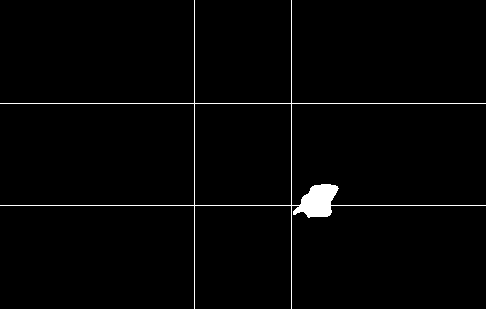

('center', 'right')

In [4]:
# default lines: height_center=0.333, width_center=0.2
x.object_location(1, grid=True)

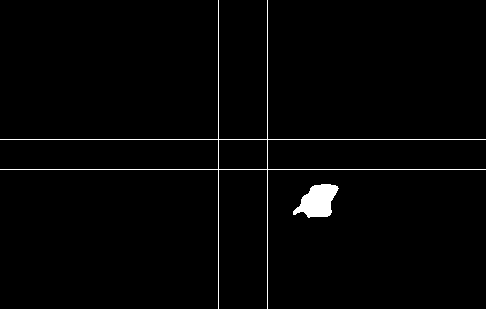

('bottom', 'right')

In [5]:
x.object_location(1, height_center=0.1, width_center=0.1, grid=True)

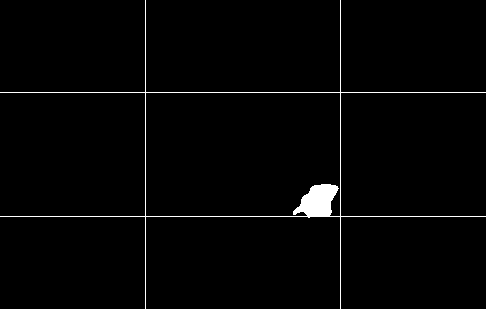

('center', 'center')

In [6]:
x.object_location(1, height_center=0.4, width_center=0.4, grid=True)

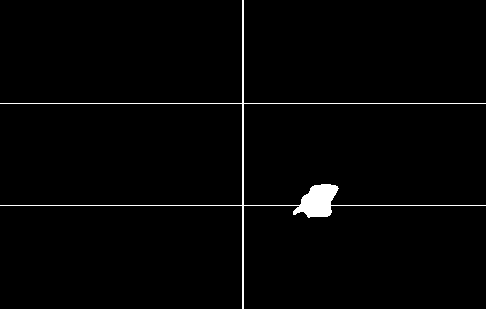

('center', 'right')

In [7]:
x.object_location(1, height_center=0.333, width_center=0.001, grid=True)

## Grid Locations
### grid_coords(object_id, height=3, width=3, grid=False)

In [8]:
imagefile = '../images/dog_grid.png'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)

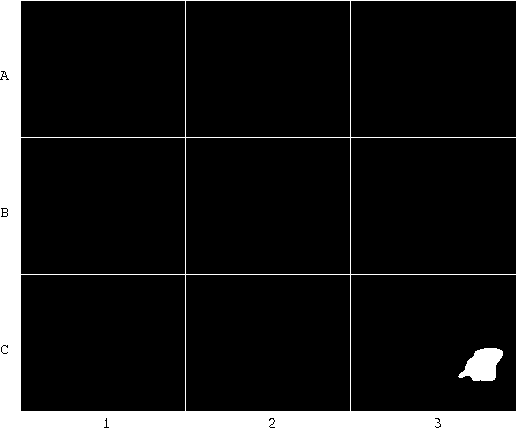

{('C', 3)}

In [9]:
x.grid_coords(1, height=3, width=3, grid=True)

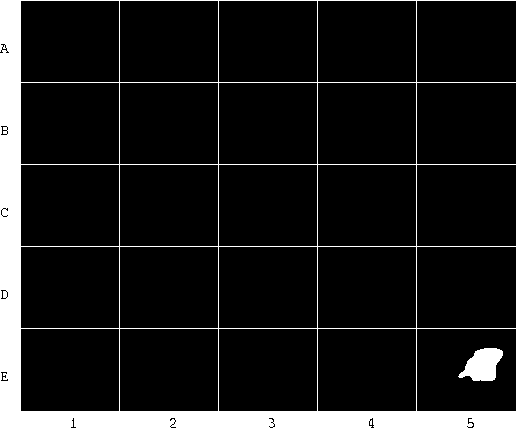

{('E', 5)}

In [10]:
x.grid_coords(1, height=5, width=5, grid=True)

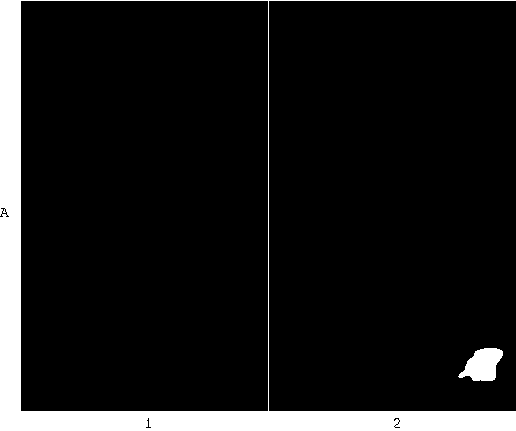

{('A', 2)}

In [11]:
x.grid_coords(1, height=1, width=2, grid=True)

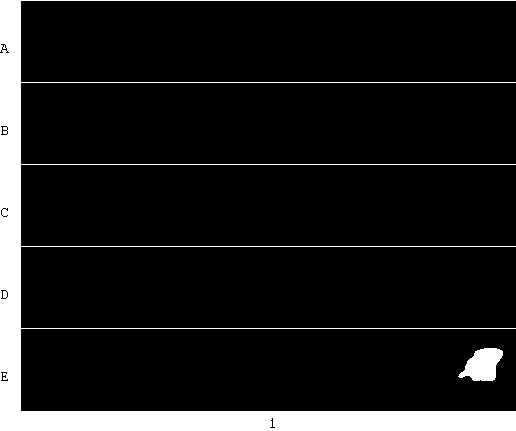

{('E', 1)}

In [12]:
x.grid_coords(1, height=5, width=1, grid=True)

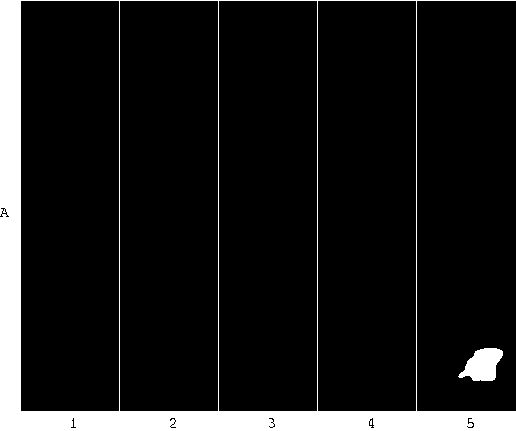

{('A', 5)}

In [13]:
x.grid_coords(1, height=1, width=5, grid=True)